In [1]:
import tensorflow as tf

/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mjs/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data('/home/mjs/Downloads/mnist.npz')

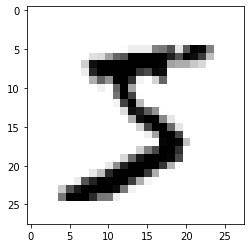

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[0])

5


In [7]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

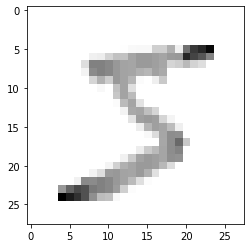

In [8]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
model=tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten())

In [11]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2600 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1077 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0746 - acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0555 - acc: 0.9818
Epoch 5/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0438 - acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0339 - acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0265 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0222 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0176 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 3s 50us/sample - loss: 

In [15]:
val_loss,val_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0964 - acc: 0.9769


In [16]:
model.save('epic_num.model')

In [17]:
new_model=tf.keras.models.load_model('epic_num.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
import numpy as np
predict=new_model.predict(x_test)
predict

array([[3.3118702e-16, 1.1932909e-13, 4.7120467e-13, ..., 1.0000000e+00,
        3.6572163e-17, 2.9320473e-11],
       [1.9105281e-17, 1.0379512e-07, 9.9999988e-01, ..., 1.1473868e-12,
        5.4384560e-14, 6.5520562e-24],
       [1.2360992e-12, 9.9999928e-01, 2.8950768e-09, ..., 6.8608239e-07,
        7.1312978e-09, 4.2878608e-13],
       ...,
       [1.7374303e-17, 7.0234440e-10, 7.3039050e-15, ..., 1.2799905e-08,
        2.5095135e-09, 1.9292734e-06],
       [1.8818926e-12, 7.4132186e-16, 4.4652741e-14, ..., 2.2158945e-11,
        7.6938704e-08, 7.3312863e-19],
       [3.6893882e-10, 2.5980174e-14, 1.0823230e-14, ..., 7.5373794e-15,
        6.9819914e-12, 3.9178514e-15]], dtype=float32)

In [19]:
print(np.argmax(predict[3]))

0


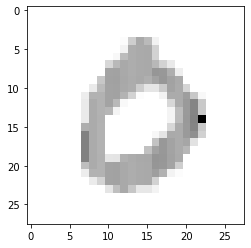

In [20]:
plt.imshow(x_test[3],cmap=plt.cm.binary)
plt.show()